# 🤖 Нейронные сети🤖

## 👨🏻‍💻 Практика 1  - Реализация простого перцептрона


 * Класс Perceptron:
 * Конструктор (init) инициализирует скорость обучения (learning_rate), количество эпох (epochs), а также веса (weights) и смещение (bias) случайными значениями.
 * Метод _activation_function реализует функцию активации (в данном случае, ступенчатую функцию).
 * Метод fit обучает перцептрон на входных данных (X) и метках (y):
 * Инициализирует веса и смещение.
 * Проходит по всем эпохам и примерам в обучающей выборке.
 * Вычисляет выход перцептрона для текущего примера.
 * Обновляет веса и смещение на основе ошибки предсказания.
 * Метод predict вычисляет выход перцептрона для новых данных.

In [3]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def _activation_function(self, x):
        return 1 if x >= 0 else 0
    # Инициализация весов и смещения
    def fit(self, X, y):
        self.weights = np.random.rand(X.shape[1])
        self.bias = np.random.rand()
        # Цикл обучения
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # Вычисление выхода перцептрона
                net_input = np.dot(X[i], self.weights) + self.bias
                output = self._activation_function(net_input)

                # Обновление весов и смещения
                self.weights += self.learning_rate * (y[i] - output) * X[i]
                self.bias += self.learning_rate * (y[i] - output)

    def predict(self, X):
          # Вычисление выхода перцептрона для новых данных
        net_input = np.dot(X, self.weights) + self.bias
        return self._activation_function(net_input)


Пример использования:

 - Создается обучающая выборка для логического ИЛИ.
 - Создается экземпляр класса Perceptron и обучается на данных.
 - Создается тестовая выборка.
 - Вычисляются предсказания для тестовой выборки.
 - Результаты выводятся на экран.

In [4]:
# Пример использования для логического ИЛИ
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

# Создание и обучение перцептрона
perceptron = Perceptron()
perceptron.fit(X, y)

# Проверка на тестовых данных
test_data = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])
predictions = [perceptron.predict(x) for x in test_data]

# Вывод результатов
print("Predictions:", predictions)

Predictions: [1, 1, 1, 0]


## 👨🏻‍💻 Практика 2 - Обучение MLP 
на наборе данных MNIST для распознавания рукописных цифр с использованием Keras.

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Загрузка набора данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Предобработка данных
# Нормализация пикселей (от 0 до 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# Преобразование данных в вектор
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))

# One-hot кодирование меток
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Создание модели MLP
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu", input_shape=(28 * 28,)),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Оценка модели
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

# Сохранение модели
model.save('mnist_mlp_model.h5')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


C:\Users\79181\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8630 - loss: 0.4670 - val_accuracy: 0.9656 - val_loss: 0.1213
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9707 - loss: 0.0966 - val_accuracy: 0.9682 - val_loss: 0.1056
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9838 - loss: 0.0546 - val_accuracy: 0.9758 - val_loss: 0.0829
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9884 - loss: 0.0370 - val_accuracy: 0.9747 - val_loss: 0.0927
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9900 - loss: 0.0306 - val_accuracy: 0.9762 - val_loss: 0.0868
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9943 - loss: 0.0176 - val_accuracy: 0.9743 - val_loss: 0.1047
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9931 - loss: 0.0209 - val_accuracy: 0.9768 - val_loss: 0.0958
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9952 - loss: 0.0149 - val_accuracy: 

Loss: 0.08888884633779526
Accuracy: 0.9782999753952026


### Объяснение:

**Загрузка и предобработка данных:**
    
Загрузка набора данных MNIST из Keras.
Преобразование типов данных в float32.
Нормализация значений пикселей от 0 до 1 для улучшения обучения.
Преобразование изображений 28x28 в векторы длиной 784.
Преобразование меток в one-hot кодирование (например, цифра 3 становится вектором 0, 0, 0, 1, 0, 0, 0, 0, 0, 0).

**Создание модели MLP:**

Создание последовательной модели Keras (keras.Sequential).

**Добавление трех слоев:**
Первй скрытый слой с 512 нейронами, функцией активации ReLU и входным размером 784.
Второй скрытый слой с 256 нейронами и функцией активации ReLU.
Выходной слой с 10 нейронами (по количеству классов) и функцией активации softmax для получения вероятностей классов.

**Компиляция модели:**
Выбор функции потерь categorical_crossentropy для задачи многоклассовой классификации.
Выбор оптимизатора adam для обновления весов.
Указание метрики accuracy для отслеживания точности во время обучения.

**Обучение модели:**
Вызов метода fit для обучения модели на обучающих данных.
Указание количества эпох (10), размера партии (128) и доли данных для валидации (0.2).

**Оценка модели:**

Вызов метода evaluate для оценки модели на тестовых данных.
Вывод значений потерь и точности.

**Сохранение модели:**

Сохранение обученной модели в файл mnist_mlp_model.h5.

Этот код обучает простую MLP для распознавания рукописных цифр из набора данных MNIST. 
Вы можете изменять архитектуру модели, гиперпараметры и оптимизаторы для улучшения ее производительности.

## 👨🏻‍💻 Практика 4 - Создание автоэнкодера для сжатия изображений из набора данных CIFAR-10 с помощью Keras.
    

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - loss: 0.6619 - val_loss: 0.6295
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6182 - val_loss: 0.6096
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6062 - val_loss: 0.6058
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.6044 - val_loss: 0.6015
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6006 - val_loss: 0.5999
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5986 - val_loss: 0.5987
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.5979 - val_loss: 0.5971
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5961 - val_loss: 0.5967
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.5947 - val_loss: 0.5950
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5945 - val_loss: 0.5949
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5924 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


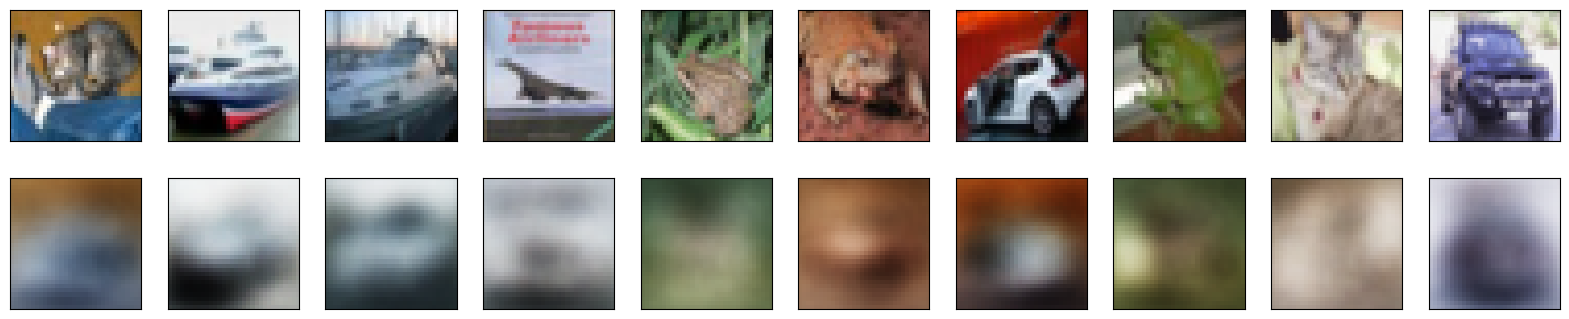

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

# Загрузка набора данных CIFAR-10
(x_train, _), (x_test, _) = cifar10.load_data()


# Предобработка данных
# Нормализация пикселей (от 0 до 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Преобразование данных в вектор
x_train = x_train.reshape((len(x_train), 32 * 32 * 3))
x_test = x_test.reshape((len(x_test), 32 * 32 * 3))

# Размерность кодированного представления (бутылочное горлышко)
encoding_dim = 32

# Создание кодера
input_img = keras.Input(shape=(32 * 32 * 3,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)


# Создание декодера
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(32 * 32 * 3, activation='sigmoid')(decoded)

# Создание автоэнкодера
autoencoder = keras.Model(input_img, decoded)

# Компиляция автоэнкодера
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Обучение автоэнкодера
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Сохранение автоэнкодера
autoencoder.save('cifar10_autoencoder.h5')

# Получение кодированных изображений (сжатие)
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# Декодирование сжатых изображений (восстановление)
decoded_imgs = autoencoder.predict(x_test)

# Визуализация результатов (опционально)
import matplotlib.pyplot as plt

n = 10  # Количество изображений для отображения
plt.figure(figsize=(20, 4))
for i in range(n):
    # Отображение исходного изображения
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Отображение восстановленного изображения
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

![](../images/04_01.png)

### Объяснение:

Загрузка и предобработка данных: аналогично предыдущему примеру.

**Создание кодера:**

Создается входной слой с размерностью 3072 (32x32x3).

Добавляются три полносвязных слоя с уменьшающимся количеством нейронов (128, 64, encoding_dim), чтобы сжать информацию в кодированное представление.

**Создание декодера:**

Используются три полносвязных слоя с увеличивающимся количеством нейронов (64, 128, 3072), чтобы восстановить изображение из кодированного представления.

**Создание и компиляция автоэнкодера:**

Создается модель keras.Model, объединяющая кодер и декодер.

Компилируется с оптимизатором adam и функцией потерь binary_crossentropy.

**Обучение автоэнкодера:**

Модель обучается на обучающей выборке (изображения сжимаются и восстанавливаются), используя тестовую выборку для валидации.

Сохранение автоэнкодера: Сохраняем обученную модель.

**Получение кодированных и декодированных изображений:**

Создается отдельная модель encoder для получения кодированных изображений.

Декодированные изображения получаются из полной модели autoencoder.

**Визуализация результатов (опционально): отображаются исходные и восстановленные изображения для сравнения.**

## 👨🏻‍💻 Практика 5 - Создание модели для генерации текста на основе LSTM, обученной на корпусе текстов 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

with open('shakespeare.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()

# Создание словаря уникальных символов
chars = sorted(list(set(text)))
char_to_int = {c: i for i, c in enumerate(chars)}
int_to_char = {i: c for i, c in enumerate(chars)}

# Создание обучающих данных
seq_length = 100
step = 3
sentences = []
next_chars = []
for i in range(0,len(text) - seq_length, step):
    sentences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

# Преобразование символов в числовые коды
x = np.zeros((len(sentences), seq_length, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
        y[i, char_to_int[next_chars[i]]] = 1

# Создание модели
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

# Обучение модели
early_stopping = EarlyStopping(monitor='loss', patience=5)
model.fit(x, y, epochs=50, batch_size=128, callbacks=[early_stopping])

# Генерация текста
def generate_text(start_index=np.random.randint(0, len(text) - seq_length), temperature=1.0):
    generated_text = text[start_index: start_index + seq_length]
    for i in range(400):
        sampled = np.zeros((1, seq_length, len(chars)))
        for t, char in enumerate(generated_text[-seq_length:]):
            sampled[0, t, char_to_int[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = int_to_char[next_index]

        generated_text += next_char

    return generated_text

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

print(generate_text())

C:\Users\79181\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 115ms/step - loss: 3.2352
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - loss: 2.8642
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - loss: 2.7649
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - loss: 2.5672
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - loss: 2.4217
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - loss: 2.3033
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - loss: 2.2389
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - loss: 2.1930
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - loss: 2.1337
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - loss: 2.1619
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - loss: 2.0832
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - loss: 2.0427
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 2.0400
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - loss: 2.0035
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 

Пояснение:

1. Загрузка и подготовка данных:
    - Загрузите текстовый корпус (в этом примере "shakespeare.txt").
    - Создайте словарь символов, чтобы преобразовывать текст в числовые данные.
    - Разделите текст на последовательности символов (предложения) и ожидаемые следующие символы.
    - Преобразуйте текстовые данные в числовые, используя one-hot кодирование.

2. Создание и обучение модели:
    - Создайте модель LSTM с помощью Keras.
    - Скомпилируйте модель, указав функцию потерь, оптимизатор и метрики.
    - Обучите модель на подготовленных данных, используя EarlyStopping для предотвращения переобучения.

3. Генерация текста:
    - Функция generate_text принимает начальный текст и температуру в качестве входных данных.
    - На основе начального текста модель предсказывает вероятности следующего символа.
    - Используя температуру, выбирается следующий символ (более высокая температура - более случайный текст).
    - Процесс повторяется, пока не будет сгенерирован текст нужной длины.

Обратите внимание:
- Вам нужно будет заменить "shakespeare.txt" на фактическое имя файла с текстовым корпусом.
- Для достижения хороших результатов может потребоваться настроить параметры модели, такие как количество эпох, размер партии и архитектура модели.
- Температура влияет на разнообразие генерируемого текста. Низкие значения температуры (ближе к 0) делают текст более предсказуемым, а высокие значения (больше 1) делают текст более случайным.

реузльтат:
```
banquet bids my heart:
  another time mine eye is my heart's guest,
  and in his thoughts of love do hostrich,
  with in toushes andyest to pinsed on shed,
  andous all avith's choof injwillldust doth.

    fatherwoud, by mare 's cailcaut auter's ugplest:
  i tosp maghturn ith ind sencust myen:
  rivine and blaronesuth repige iftern,
  icheree farline sow'swill not prive,
  undo lowsk's linsu to heart'u predewrod.
  swealld ti parke sfould san's os lest,
  atsedurm a mausty frith to beart,
  fro
```

## 👨🏻‍💻 Практика 6 - Классификация изображений 

Epoch 1/10


C:\Users\79181\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7964 - loss: 0.8797 - val_accuracy: 1.0000 - val_loss: 0.1126
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0491 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 9.8783e-04 - val_accuracy: 1.0000 - val_loss: 4.4035e-04
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 3.7517e-04 - val_accuracy: 1.0000 - val_loss: 3.1397e-04
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 2.9078e-04 - val_accuracy: 1.0000 - val_loss: 2.5142e-04
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 2.3412e-04 - val_accuracy: 1.0000 - val_loss: 2.0737e-04
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 1.9657e-04 - val_accuracy: 1.0000 - val_loss: 1.7304e-04
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 1.59

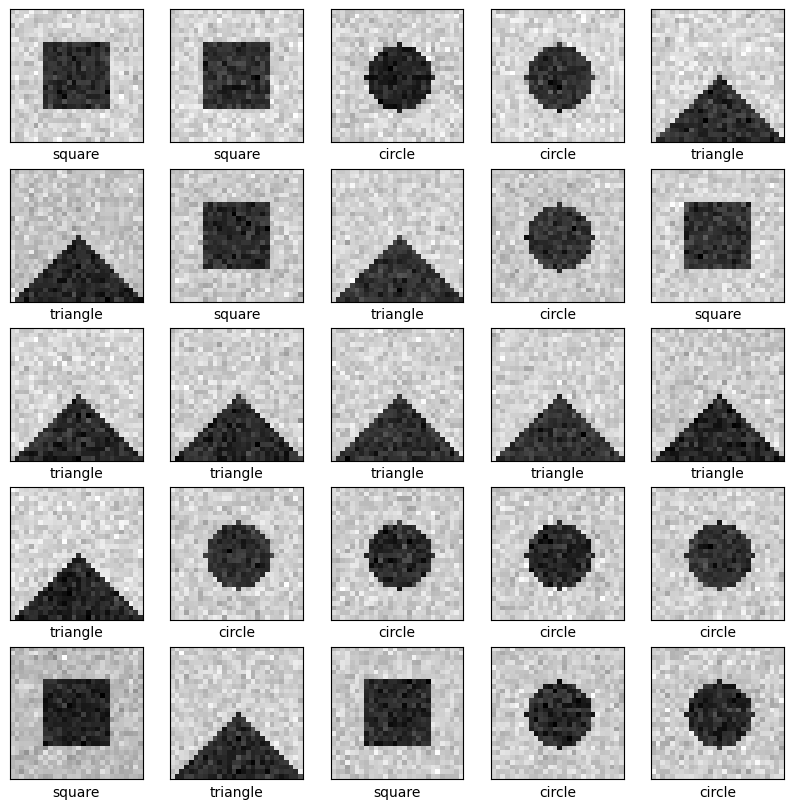

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


# Генерация данных: фигуры (круги, квадраты и треугольники)
def generate_shape(shape, size=28, noise=0.1):
    image = np.zeros((size, size))
    center = size // 2
    radius = size // 4

    if shape == 'circle':
        for i in range(size):
            for j in range(size):
                if np.sqrt((i - center)**2 + (j - center)**2) <= radius:
                    image[i, j] = 1
    elif shape == 'square':
        image[center - radius:center + radius, center - radius:center + radius] = 1
    elif shape == 'triangle':
        for i in range(size):
            for j in range(size):
                if (i >= center and j >= center - (i - center) and j <= center + (i - center)):
                    image[i, j] = 1

    image += np.random.randn(size, size) * noise
    return image


# Генерация обучающих данных
n_samples = 1000
shapes = ['circle', 'square', 'triangle']
X = np.zeros((n_samples, 28, 28, 1))
y = np.zeros(n_samples)

for i in range(n_samples):
    shape_idx = np.random.randint(0, len(shapes))
    X[i, :, :, 0] = generate_shape(shapes[shape_idx])
    y[i] = shape_idx

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)


# Создание модели
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation='relu'),
        layers.Dense(len(shapes), activation='softmax')
    ]
)

# Компиляция модели
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

# Визуализация результатов
predictions = model.predict(X_test)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i, :, :, 0], cmap=plt.cm.binary)
    plt.xlabel(shapes[np.argmax(predictions[i])])
plt.show()

### Объяснение кода:

1. Генерация данных:
   - Функция generate_shape создает изображение заданной фигуры (круг, квадрат, треугольник) с шумом.
   - Создается набор данных из n_samples изображений с метками классов (0, 1, 2).

2. Создание модели CNN:

   - Два сверточных слоя (Conv2D) с функцией активации ReLU.
   - Два слоя пулинга (MaxPooling2D).
   - Слой Flatten для преобразования многомерных данных в вектор.
   - Полносвязный слой (Dense) с 10 нейронами и ReLU.
   - Выходной слой (Dense) с количеством нейронов, равным количеству классов, и функцией активации softmax.

3. Компиляция модели:

   - Оптимизатор: adam.
   - Функция потерь: sparse_categorical_crossentropy (для целочисленных меток классов).
   - Метрика: accuracy.

Обучение модели: Модель обучается на обучающей выборке с валидацией на тестовой выборке.  
Оценка модели: Вычисляются значения потерь и точности на тестовой выборке.  
Визуализация предсказаний: Отображаются изображения из тестовой выборки с предсказанными метками классов.  


Этот пример демонстрирует, как создать и обучить простую CNN для  классификации изображений фигур. Вы можете изменять  архитектуру модели, гиперпараметры и данные для решения других задач  классификации изображений.